In [3]:
# We begin by importing all the necessary libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

#ignore warning
import warnings
warnings.filterwarnings("ignore")

In [4]:
file_loc = r"C:\Users\USER\Desktop\Walmart (2).xlsx"
df = pd.read_excel(file_loc)

In [7]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2572,2.110964e+09,8106
1,1,2010-02-12,1641957.44,1,38.51,2548,2.112422e+09,8106
2,1,2010-02-19,1611968.17,0,39.93,2514,2.112891e+09,8106
3,1,2010-02-26,1409727.59,0,46.63,2561,2.113196e+09,8106
4,1,2010-03-05,1554806.68,0,46.5,2625,2.113501e+09,8106


In [8]:
# Finding information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   object        
 5   Fuel_Price    6435 non-null   object        
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 402.3+ KB


##### We start our data cleaning from here

In [9]:
# converting date object to datetime
df['Date'] = pd.to_datetime(df.Date)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2572,2.110964e+09,8106
1,1,2010-02-12,1641957.44,1,38.51,2548,2.112422e+09,8106
2,1,2010-02-19,1611968.17,0,39.93,2514,2.112891e+09,8106
3,1,2010-02-26,1409727.59,0,46.63,2561,2.113196e+09,8106
4,1,2010-03-05,1554806.68,0,46.5,2625,2.113501e+09,8106


In [10]:
# Reframing the columns by breaking the date into weeks, month and year for analysis

df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

df.drop(['Date'], axis=1, inplace=True)#,'month'

target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)

df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2572,2.110964e+09,8106,4,2,2010
1,1,1641957.44,1,38.51,2548,2.112422e+09,8106,4,2,2010
2,1,1611968.17,0,39.93,2514,2.112891e+09,8106,4,2,2010
3,1,1409727.59,0,46.63,2561,2.113196e+09,8106,4,2,2010
4,1,1554806.68,0,46.5,2625,2.113501e+09,8106,4,3,2010


In [11]:
# Checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   object 
 4   Fuel_Price    6435 non-null   object 
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   object 
 7   weekday       6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 502.9+ KB


In [12]:
# checking for unique values
df.nunique()

Store             45
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3518
Fuel_Price       890
CPI             2145
Unemployment     349
weekday            1
month             12
year               3
dtype: int64

In [13]:
# Checking for missing values in each column
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
weekday         0
month           0
year            0
dtype: int64

##### Business Analytics and Visualization

In [14]:
# Finding the total sales
df.Weekly_Sales.sum()

6737218987.11

In [15]:
# The stores with the highest weekly sales
df.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False).head(5)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Store'>

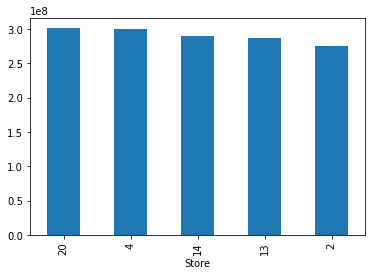

In [16]:
# The stores with the highest weekly sales visualization
df.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

In [17]:
# The stores with the lowest weekly sales
df.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False).tail(5)

Store
38    55159626.42
36    53412214.97
5     45475688.90
44    43293087.84
33    37160221.96
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Store'>

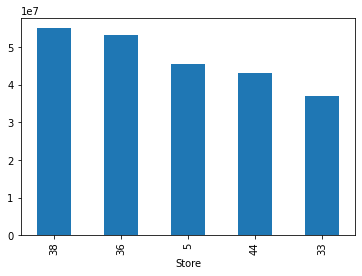

In [18]:
# The stores with the lowest sales
df.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False).tail(5).plot(kind='bar')

<AxesSubplot:xlabel='year'>

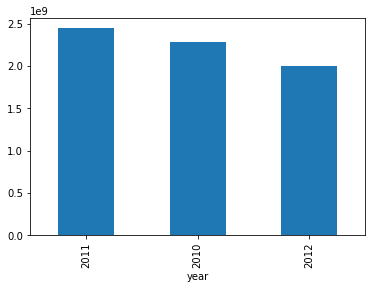

In [19]:
# The year with the highest sales
df.groupby(['year'])['Weekly_Sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

<AxesSubplot:xlabel='year'>

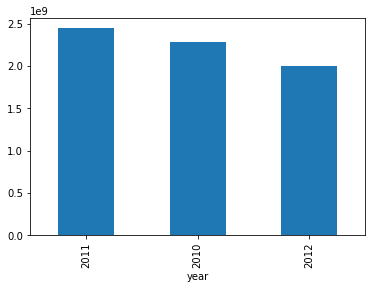

In [20]:
# The year with the lowest sales
df.groupby(['year'])['Weekly_Sales'].sum().sort_values(ascending=False).tail(5).plot(kind='bar')

In [21]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,1.298818e+01,1.00,1.200000e+01,2.300000e+01,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,5.643666e+05,209986.25,5.533501e+05,9.607460e+05,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,2.550489e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
CPI,6435.0,1.485812e+09,7.065671e+08,128.13,1.291508e+09,1.382815e+09,2.115206e+09,2.272328e+09
weekday,6435.0,4.000000e+00,0.000000e+00,4.00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
month,6435.0,6.447552e+00,3.238308e+00,1.00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
year,6435.0,2.010965e+03,7.970193e-01,2010.00,2.010000e+03,2.011000e+03,2.012000e+03,2.012000e+03


In [22]:
#df['Temperature'] = df['Temperature'].astype(float)
#df['Fuel_Price'] = df['Fuel_Price'].astype(float)
#df['Unemployment'] = df['Unemployment'].astype(float)

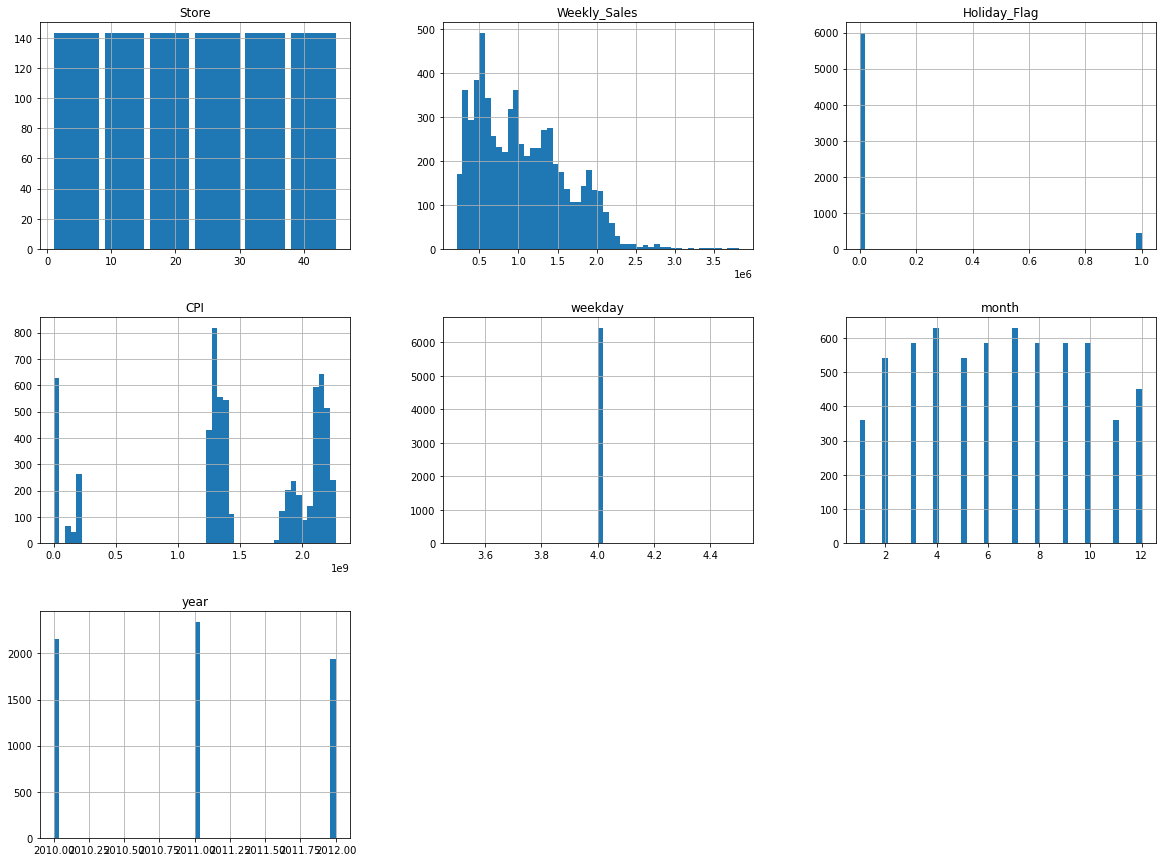

In [23]:
# Histogram for all columns
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

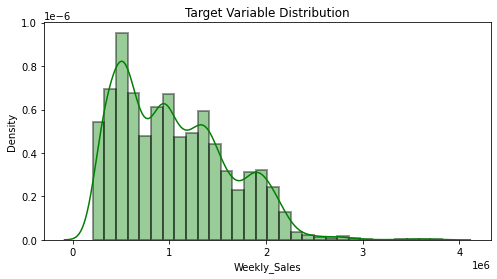

In [24]:
#Let us analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

In [25]:
# Correlation Analysis
df.corr()

,Store,Weekly_Sales,Holiday_Flag,CPI,weekday,month,year
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.121575,NaN,2.910676e-15,3.474318e-12
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.041168,NaN,7.614332e-02,-1.837754e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.003424,NaN,1.229958e-01,-5.678257e-02
CPI,-1.215749e-01,-0.041168,-3.423642e-03,1.000000,NaN,-1.041957e-02,7.516653e-02
weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,2.910676e-15,0.076143,1.229958e-01,-0.010420,NaN,1.000000e+00,-1.944645e-01
year,3.474318e-12,-0.018378,-5.678257e-02,0.075167,NaN,-1.944645e-01,1.000000e+00


In [26]:
# Finding the the predictor with the highest relatioship with sales
corr = pd.DataFrame(df.corr()['Weekly_Sales'].drop('Weekly_Sales'))
corr.sort_values(['Weekly_Sales'], ascending = False)

,Weekly_Sales
month,0.076143
Holiday_Flag,0.036891
year,-0.018378
CPI,-0.041168
Store,-0.335332
weekday,NaN


<AxesSubplot:>

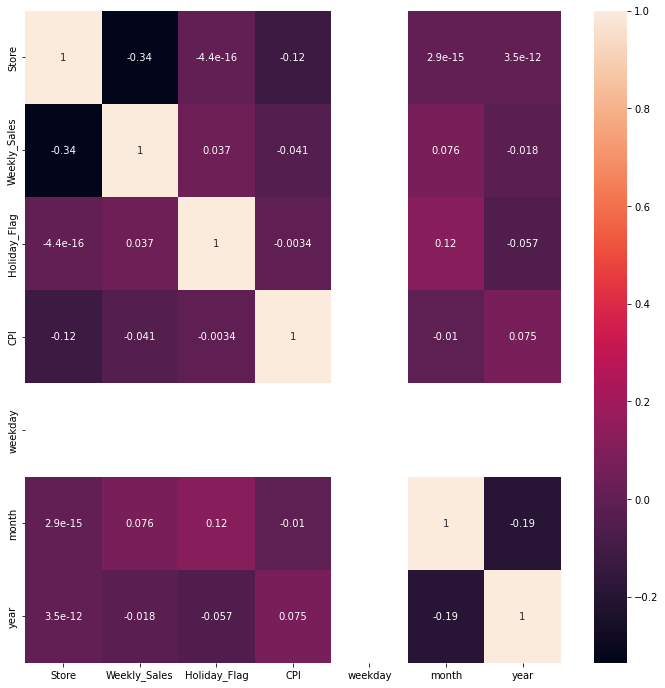

In [27]:
# correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

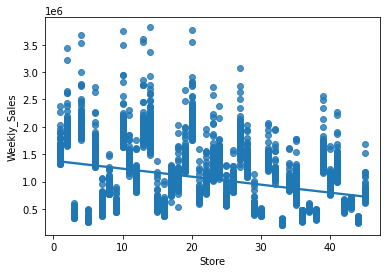

In [28]:
# Regression Analysis between sales and store
sns.regplot('Store', 'Weekly_Sales', df)

<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

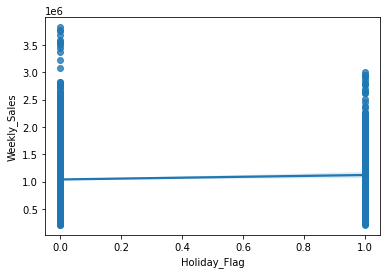

In [29]:
# Regression Analysis between sales and Holiday_Flag
sns.regplot('Holiday_Flag', 'Weekly_Sales', df)

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

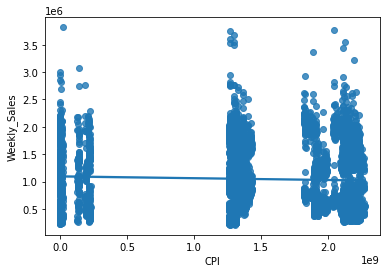

In [30]:
# Regression Analysis between sales and CPI
sns.regplot('CPI', 'Weekly_Sales', df)

<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

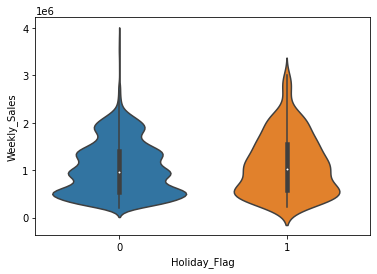

In [31]:
# data visualisation for 
sns.violinplot(x="Holiday_Flag", y="Weekly_Sales", data=df)

##### Statistical Inference for variable or feature selection

In [32]:
# Categorical to Dummy Variables
df =  pd.get_dummies(df, columns=["Store", "Holiday_Flag", "weekday", "month", "year"],
                         prefix=["Store", "Holiday_Flag", "weekday", "month", "year"],
                         drop_first=True)
df.head(2)

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,Store_6,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
0,1643690.90,42.31,2572,2.110964e+09,8106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,38.51,2548,2.112422e+09,8106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Convert columns to numeric types
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Fuel_Price'] = pd.to_numeric(df['Fuel_Price'], errors='coerce')
df['Unemployment'] = pd.to_numeric(df['Unemployment'], errors='coerce')

In [34]:
# Replace missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Replace infinite values with a finite value (e.g., 0)
df.replace([np.inf, -np.inf], 0, inplace=True)

In [35]:
### c. checking for p-value (TESTING FOR STATISTICAL SIGNIFICANCE OF INDEPENDENT VARIABLES for variable selection)
import scipy.stats as stats
df_corr = pd.DataFrame() # Correlation matrix
df_p = pd.DataFrame() # Matrix of p-values
for x in df.columns:   # assuming df as your dataframe name
   for y in df.columns:
      corr = stats.pearsonr(df[x], df[y])
      df_corr.loc[x,y] = corr[0]
      df_p.loc[x,y] = corr[1]

df_p['Weekly_Sales']

Weekly_Sales    0.000000e+00
Temperature     2.470630e-08
Fuel_Price      7.155346e-01
CPI             9.559829e-04
Unemployment    9.127018e-12
                    ...     
month_10        3.336595e-02
month_11        5.170657e-04
month_12        4.147550e-20
year_2011       9.378679e-01
year_2012       2.149766e-01
Name: Weekly_Sales, Length: 63, dtype: float64

##### Model Building and Selection

In [36]:
# Separating target variable and predictors
y = df ['Weekly_Sales']
x = df.drop(['Weekly_Sales'], axis =1)

In [37]:
# Normalization data to bring all values to common scale
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x).transform(x)
X[0:1]

array([[-1.08032351, -1.6768291 ,  0.88484192,  0.11639643, -0.15075567,
        -0.15075567, -0.15075567, -0.15075567, -0.15075567, -0.15075567,
        -0.15075567, -0.15075567, -0.15075567, -0.15075567, -0.15075567,
        -0.15075567, -0.15075567, -0.15075567, -0.15075567, -0.15075567,
        -0.15075567, -0.15075567, -0.15075567, -0.15075567, -0.15075567,
        -0.15075567, -0.15075567, -0.15075567, -0.15075567, -0.15075567,
        -0.15075567, -0.15075567, -0.15075567, -0.15075567, -0.15075567,
        -0.15075567, -0.15075567, -0.15075567, -0.15075567, -0.15075567,
        -0.15075567, -0.15075567, -0.15075567, -0.15075567, -0.15075567,
        -0.15075567, -0.15075567, -0.15075567, -0.27420425,  3.30403793,
        -0.31622777, -0.32943456, -0.30265996, -0.31622777, -0.32943456,
        -0.31622777, -0.31622777, -0.31622777, -0.24343225, -0.27420425,
        -0.75592895, -0.65574385]])

In [38]:
# splitting data into training and test data at 80% and 20% respectively
from sklearn.model_selection import train_test_split
xm_train, xm_test, ym_train, ym_test = train_test_split(X, y, train_size = 0.8, random_state = 100)

###### Building model with multiple linear regression

In [39]:
lin = lm.LinearRegression()
lin.fit(xm_train, ym_train)
y_pred = lin.predict(xm_test)
print("Mean Square Error: ", mean_squared_error(ym_test, y_pred))
print("Variance or r-squared: ", explained_variance_score(ym_test, y_pred))

Mean Square Error:  18493107679.295235
Variance or r-squared:  0.9429018333238277


##### Building model with Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

rfr = RandomForestRegressor(n_estimators=13, random_state=0)
rfr.fit(xm_train, ym_train)
y_predicted = rfr.predict(xm_test)
print("Mean Square Error: ", mean_squared_error(ym_test, y_predicted))
print("Variance or r-squared: ", explained_variance_score(ym_test, y_predicted))

Mean Square Error:  17536449249.215878
Variance or r-squared:  0.9457754621459217


#### Building model with Decision Tree Regressor

In [43]:
from sklearn import tree
from sklearn.metrics import mean_squared_error, explained_variance_score

dtr = tree.DecisionTreeRegressor()
dtr.fit(xm_train, ym_train)
ntree = dtr.predict(xm_test)
print("Mean Square Error: ", mean_squared_error(ym_test, ntree))
print("Variance or r-squared: ", explained_variance_score(ym_test, ntree))

Mean Square Error:  20811360827.70793
Variance or r-squared:  0.9356848276001741


#### Model Evaluation and Deployment

In [44]:
# Linear Regression 
Dep_pred = lin.predict(X)
# Evaluation
print("mean square error: ", mean_squared_error(y, Dep_pred))
print("variance or r-squared: ", explained_variance_score(y, Dep_pred))

mean square error:  20210718731.51002
variance or r-squared:  0.9365401199023865


Text(0, 0.5, 'medv')

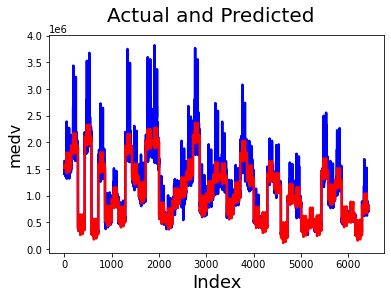

In [45]:
# Actual vs Predicted
c = [i for i in range(1, 6436, 1)]
fig = plt.figure()
plt.plot(c, y, color = "blue", linewidth = 2.5, linestyle = "-" )
plt.plot(c, Dep_pred, color = "red", linewidth = 2.5, linestyle = "-" )
fig.suptitle('Actual and Predicted', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('medv', fontsize = 16)

In [46]:
# Random Forest Regressor
Dep = rfr.predict(X)
print("mean square error: ", mean_squared_error(y, Dep))
print("variance or r-squared: ", explained_variance_score(y, Dep))

mean square error:  6303230426.866555
variance or r-squared:  0.9802072416003019


Text(0, 0.5, 'medv')

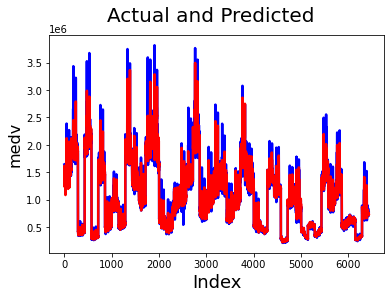

In [47]:
# Actual vs Predicted
c = [i for i in range(1, 6436, 1)]
fig = plt.figure()
plt.plot(c, y, color = "blue", linewidth = 2.5, linestyle = "-" )
plt.plot(c, Dep, color = "red", linewidth = 2.5, linestyle = "-" )
fig.suptitle('Actual and Predicted', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('medv', fontsize = 16)

In [49]:
# Top five most influential variables
feature_importances = pd.DataFrame(dtr.feature_importances_, index=x.columns, columns=['importance']).sort_values('importance', ascending=False).head()

feature_importances

,importance
Store_4,0.080307
Store_20,0.077246
Store_14,0.076794
Store_13,0.074697
Store_2,0.070168


###### Further evaluation using cross validation

In [49]:
# Using cross validation to test the best model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfr, X, y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [50]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [1022983.63981052  465873.94020242  568771.66990553  414838.80627378
  646523.38087181  491622.70321902  567520.37977814  640965.07975221
  540085.40586751  553364.78132487]
Mean: 591254.9787005818
Standard deviation: 159313.4680046263


##### Tuning our model before deployment

In [51]:
# Tuning our model
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X, y)
print(grid_search)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')


In [52]:
# obtaining the best parameters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [53]:
# obtaining the best estimators
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [54]:
# printing all MSE for each parameter combinations
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

698845.5981393111 {'max_features': 2, 'n_estimators': 3}
654392.6814014538 {'max_features': 2, 'n_estimators': 10}
636187.4016068892 {'max_features': 2, 'n_estimators': 30}
676467.9014538403 {'max_features': 4, 'n_estimators': 3}
641477.6799379607 {'max_features': 4, 'n_estimators': 10}
630283.8001052317 {'max_features': 4, 'n_estimators': 30}
666438.6093668051 {'max_features': 6, 'n_estimators': 3}
626478.3079380571 {'max_features': 6, 'n_estimators': 10}
607715.8792812905 {'max_features': 6, 'n_estimators': 30}
642656.8134494207 {'max_features': 8, 'n_estimators': 3}
609862.1155464306 {'max_features': 8, 'n_estimators': 10}
608552.6452037573 {'max_features': 8, 'n_estimators': 30}
680915.1800373765 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
659532.2617214441 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
682931.2806871571 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
642155.878190613 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}